# TP2 Complexité

En informatique, on s'interesse à la complexité des algorithmes lorsque l'on veut :

- Evaluer l'efficacité d'un algo

- Comparer deux algo indéependamment de l'environnement (machine, système, compilateur, . . .). On évalue alors le nombre d'opérations éléementaires en fonction de la taille des données, de la nature des données.

Notations :

- $n$ : taille des données,

- $T(n)$ : nombre d'opérations élémentaires dans le pire des cas. Si on a très rarement l'expression de $T(n)$ en fonction de $n$, on arrive à comparer $T(n)$ à des suites "de référence".

## Exercice 1 - Premier exemple : un algorithme de calcul

On veut évaluer la complexité $T(n)$ du premier algorithme du TP1.

In [2]:
def a(n):
	res=0.25
	for i in range(n):
		res=2*res+1
	return res

Expliquez chacune des étapes ci-dessous puis en déduire comment trouver la complexité d'un algorithme.

In [3]:
#ETAPE 1

def a(n):
	nbiter=0
	res=0.25
	for i in range(n):
		res=2*res+1
		nbiter+=1
	return (res,nbiter)

def T(n):
	return a(n)[1]


Réponse : 

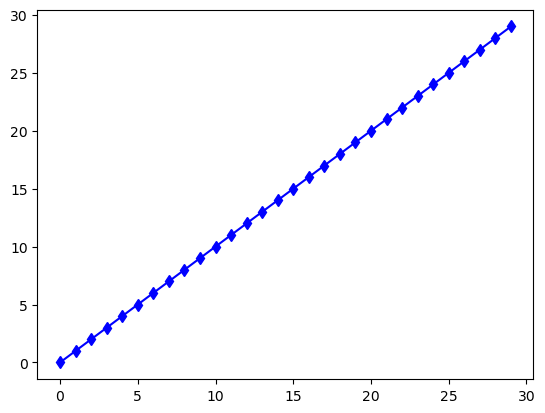

In [4]:
#ETAPE 2

import matplotlib.pyplot as plt

xn=range(30)
tn=[T(n) for n in xn]
plt.plot(xn,tn,'db-')
plt.show()

Réponse : 

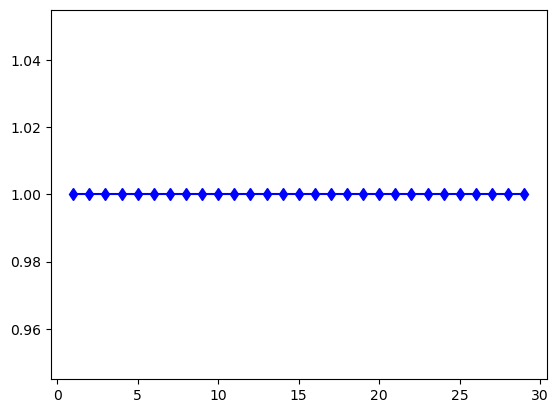

In [10]:
#ETAPE 3 

xn=range(1,30)
qn=[T(n)*1.0/n for n in xn]
plt.plot(xn,qn,'db-')
plt.show()

Réponse : O(n) car borné on verifie en divisant par la complexité qu'on a trouvé

## Exercice 2 - Un autre algorithme de calcul

On veut évaluer la complexité $T(n)$ de l'algorithme suivant :

In [31]:
def A(n):
    res=0
    for k in range(n):
        if (n%2==0):
            for i in range(n):
                res=res+i
        else :
            res =3* res +1
    return res

def A1(n):
    res = 0
    cpt = 0
    for k in range(n):
        if (n%2==0):
            for i in range(n):
                res=res+i
                cpt+=1
        else :
            res =3* res +1
            cpt+=1
    return res,cpt

def T1(n):
    return A1(n)[1]


1. Ajouter un compteur permettant de compter le nombre d'opérations élémentaires.
2. Construire la liste des $T(n)$ pour $n$ variant de 0 à 50.
3. Représenter la suite $T(n)$ et conjecturer son com-
portement
4. Validez votre conjecture.

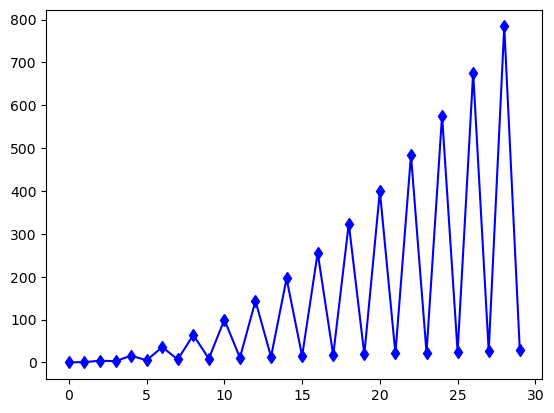

In [38]:
import matplotlib.pyplot as plt

xn=range(30)
tn=[T1(n) for n in xn]
plt.plot(xn,tn,'db-')
plt.show()

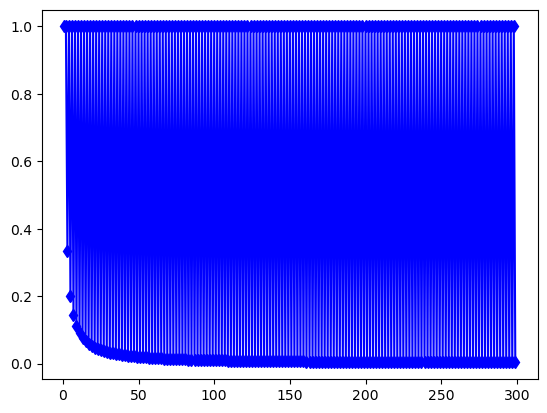

In [42]:
xn=range(1,300)
qn=[T1(n)*1.0/n**2 for n in xn]
plt.plot(xn,qn,'db-')
plt.show()

Réponse : o(N^2) car on a une boucle dans une boucle et le quotien est bornée par 1 et 0

## Exercice 3 - Recherche séquentielle dans une liste

On veut évaluer la complexité $T(n)$ de l'algorithme de recherche séquentielle dans un tableau
(où $n$ est la taille du tableau).

1. Terminer l'écriture de la
fonction Recherche (et
testez la !!)
2. Ajouter un compteur
permettant de compter
le nombre d'opérations
élémentaires.
3. Construire la liste des
$T(n)$ pour $n$ variant
de 0 à 100000 avec
un pas de 1000. (On
recherchera un nombre
aléatoire choisi entre 1 et 1000)
4. Représenter la suite
$T(n)$ et conjecturer son
comportement

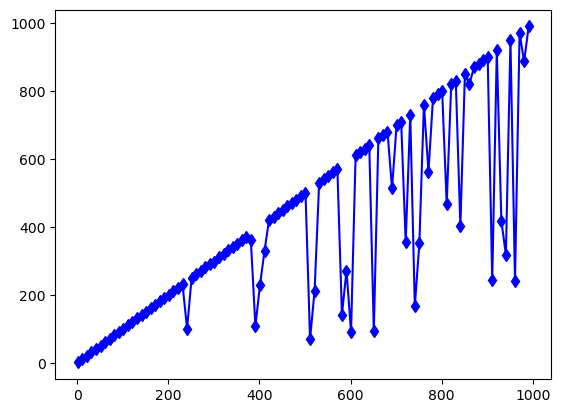

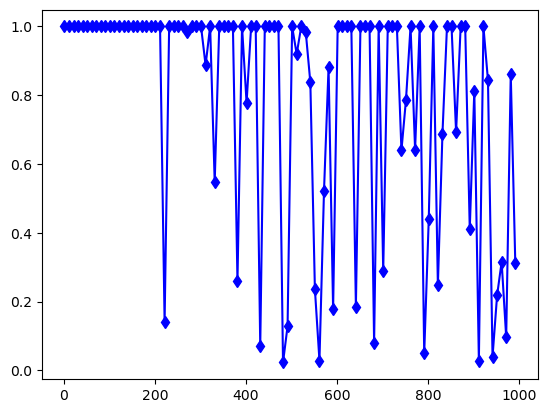

In [40]:

from random import *

def tab(n):
    return [ randint(1 ,1000) for i in range(n)]

# renvoie True si x est dans tab, False sinon

def Recherche (x,tab):
    if x in tab: 
        return True 
    else :
        return False


#O(n)

def Recherche(x,tab):
    compteur = 0
    for i in tab:
        compteur += 1
        if i == x :
            compteur += 1
            return True,compteur
    return False,compteur
def T2(n):
    return Recherche(randint(1,500),tab(n))[1]

xn = range(1, 1000, 10)
tn = [Recherche(randint(1,500),tab(n))[1] for n in xn]
plt.plot(xn, tn, 'db-')
plt.show()



xn = range(1, 1000, 10)
tn = [Recherche(randint(1,500),tab(n))[1] /n for n in xn]
plt.plot(xn, tn, 'db-')
plt.show()


Réponse : 

## Exercice 4 - Recherche dichotomique dans un tableau trié
On veut évaluer la complexité $T(n)$ de l'algorithme de recherche dichotomique dans un
tableau trié (où $n$ est la taille du tableau).

1. Terminer l'écriture de la fonction RechercheDicho (et testez la !!)
2. Ajouter un compteur permettant de compter le nombre d'opérations élémentaires.
3. Construire la liste des $T(n)$ pour $n$ variant de 0 à 1000. (On recherchera un nombre
aléatoire choisi entre 1 et 1000)
4. Représenter la suite $T(n)$ et conjecturer son comportement
5. Valider votre conjecture.

In [41]:
from random import *
from math import *

def tab(n):
    temp =[randint (1,1000) for i in range(n)]
    temp.sort()
    return temp

# RechercheDicho renvoie l'indice de x dans tab
# ou -1 si x n'est pas dans tab
    """
    on prends deux extremite on regarde le milieu si le mileu est supperieur a la valeur chercher alors la valeur de gauche devien 
    
    
    1. a0 = a; b0 = b.
    2. Pour n ≥ 0,
        a) cn = an+bn
    2
        b) I. Si f (cn) = 0 alors cn est un zéro de f et le processus est arrêté.
           II. Sinon :
        – si f (cn)f (bn) < 0 alors an+1 = cn et bn+1 = bn.
        – si f (cn)f (bn) > 0 alors an+1 = an et bn+1 = cn.
    """
def RechercheDicho(x,tab):
    a = tab[0]
    b = tab[len(tab)-1]
    
    while abs(b-a) > 10**(-n):

print(RechercheDicho(randint(1,1000),tab(1000)))

None


Réponse : 

## Exercice 5 - Des algorithmes de tri


Evaluer la complexité $T(n)$ des différents algorithmes de tri que vous avez vus (où $n$
est la taille du tableau). Quel est le plus performant ? le moins performant ?

- Tri par sélection

- Tri à bulles

- Tri par insertion